In [6]:
import torchvision
import torch
from torchvision import transforms


class_name = ['Aluminium', 'Carton', 'E-waste', 'Glass', 'Organic_Waste', 'Paper_and_Cardboard', 'Plastics', 'Textiles', 'Wood']
class_name_idx = {'Aluminium': 0, 'Carton': 1, 'E-waste': 2, 'Glass': 3, 'Organic_Waste': 4, 'Paper_and_Cardboard': 5, 'Plastics': 6, 'Textiles': 7, 'Wood': 8}




In [8]:
weights = torchvision.models.ResNet50_Weights.DEFAULT
model_4 = torchvision.models.resnet50(weights=weights)

model_4.fc = torch.nn.Linear(in_features=2048,
                    out_features=len(class_name),
                    bias=True)

model_4.load_state_dict(torch.load("models\MultiClassResNET50Model4.pth"))


<All keys matched successfully>

In [ ]:
resnet50_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.CenterCrop(224),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.299, 0.224, 0.225])
])

In [ ]:
import matplotlib.pyplot as plt
from typing import List, Tuple
from PIL import Image

def pred_and_plot_image(
    model: torch.nn.Module,
    class_names: List[str],
    image_path: str,
    image_size: Tuple[int, int] = (224, 224),
    transform: torchvision.transforms = None,
):


    # Open image
    img = Image.open(image_path)

    print(img)

    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose(
            [
                transforms.Resize(image_size),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
                ),
            ]
        )

    model

    model.eval()
    with torch.inference_mode():
        transformed_image = image_transform(img).unsqueeze(dim=0)
        target_image_pred = model(transformed_image)

    # Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # Plot image with predicted label and probability
    plt.figure()
    plt.imshow(img)
    plt.title(
        f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}"
    )
    plt.axis(False)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x1280 at 0x1D355531FD0>


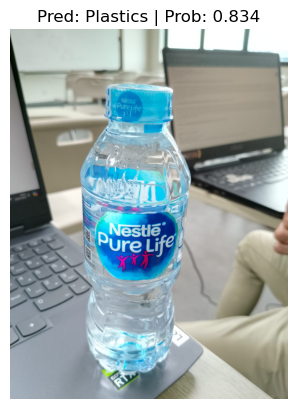

In [9]:
pred_and_plot_image(model=model_4, image_path="test_image_2.jpeg", transform=resnet50_transform, class_names=class_name)